EMOTIONAL DETECTOR

IMPORTING LIBRARIES

In [2]:

import matplotlib.pyplot as plt #to plot the training losses and traing accuracy curve
from glob import glob           #to create a list of all the files present in directory
import random                   #to choose a rondom data from dataset
import os
import cv2
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image


EXPLORING DATASET

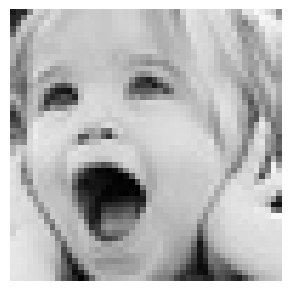

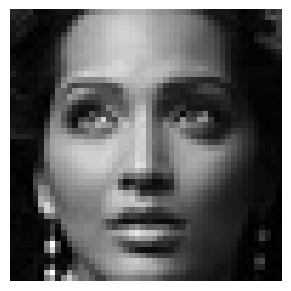

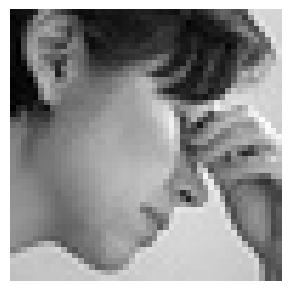

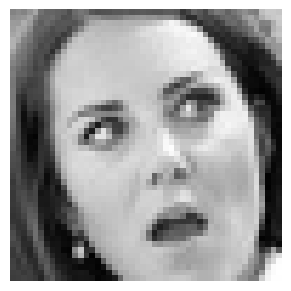

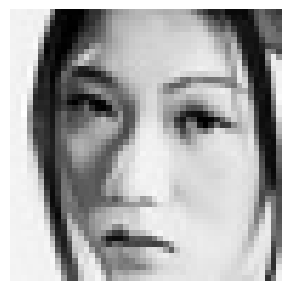

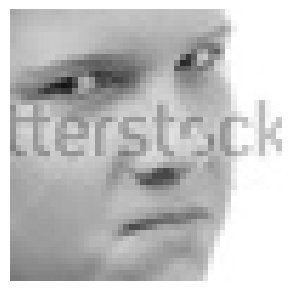

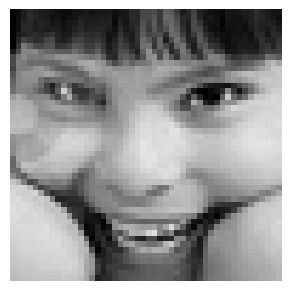

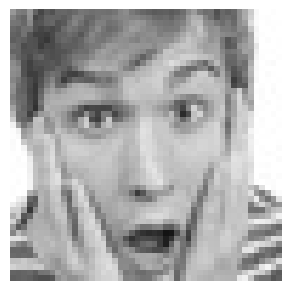

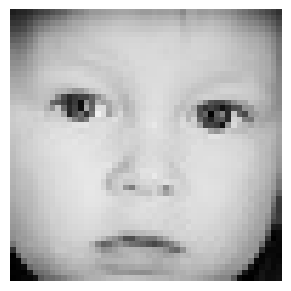

In [ ]:
images = glob("train/**/**") # Last two star for showing the image present
# before 2 star is for going through all the directory in the train folder
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

PREPARING DATA FOR TRAINING

In [ ]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size = (img_size,img_size),color_mode = "grayscale",batch_size=batch_size,class_mode = "categorical",shuffle = True)


datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",target_size = (img_size,img_size),color_mode = "grayscale",batch_size=batch_size,class_mode = "categorical",shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


DEFINING THE MODEL

In [ ]:
def convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters,kernel_size = kernel_size,padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [ ]:
def dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [ ]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = convolution(inputs,32,(3,3))
    conv_2 = convolution(inputs,64,(5,5))
    conv_3 = convolution(inputs,12,(5,5))
    
    flatten = Flatten()(conv_3)
    dense_1 = dense_f(flatten,256)
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss =['categorical_crossentropy'],optimizer='Adam',metrics = ['accuracy'])
    
    return model

In [ ]:
model  =  model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 12)        312       
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 12)        48        
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 12)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 12)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 12)        0  

In [ ]:
epochs = 20
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("/absolute/path/to/model_weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)

callbacks = [checkpoint]

NameError: name 'train_generator' is not defined

TRAINING THE MODEL

In [ ]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.8898 - accuracy: 0.2729
Epoch 1: saving model to /absolute/path/to\model_weights.h5
448/448 [==============================] - 498s 1s/step - loss: 1.8898 - accuracy: 0.2729 - val_loss: 1.6660 - val_accuracy: 0.3128
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.6822 - accuracy: 0.3159
Epoch 2: saving model to /absolute/path/to\model_weights.h5
448/448 [==============================] - 433s 967ms/step - loss: 1.6822 - accuracy: 0.3159 - val_loss: 1.6184 - val_accuracy: 0.3669
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.6354 - accuracy: 0.3402
Epoch 3: saving model to /absolute/path/to\model_weights.h5
448/448 [==============================] - 74s 164ms/step - loss: 1.6354 - accuracy: 0.3402 - val_loss: 1.5663 - val_accuracy: 0.3993
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.5904 - accuracy: 0.3636
Epoch 4: saving model to /absolut

MODEL EVALUATION

In [ ]:
model.evaluate(validation_generator)

113/113 [==============================] - 4s 31ms/step - loss: 1.5066 - accuracy: 0.4189


[1.5065603256225586, 0.4189189076423645]

PLOTTING LOSS

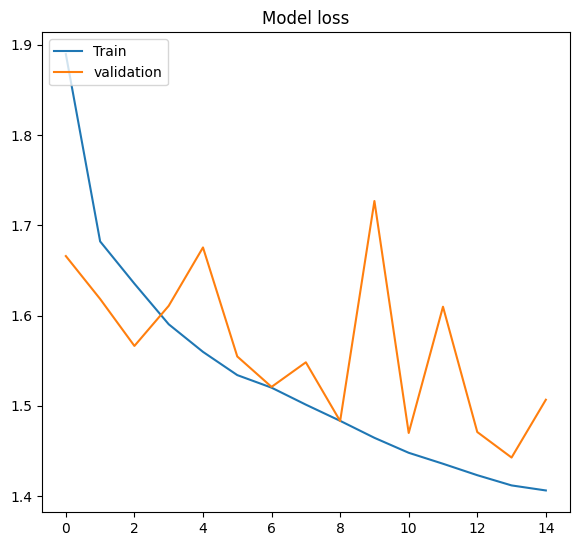

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.legend(['Train','validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,hspace = 0.25,wspace = 0.35)

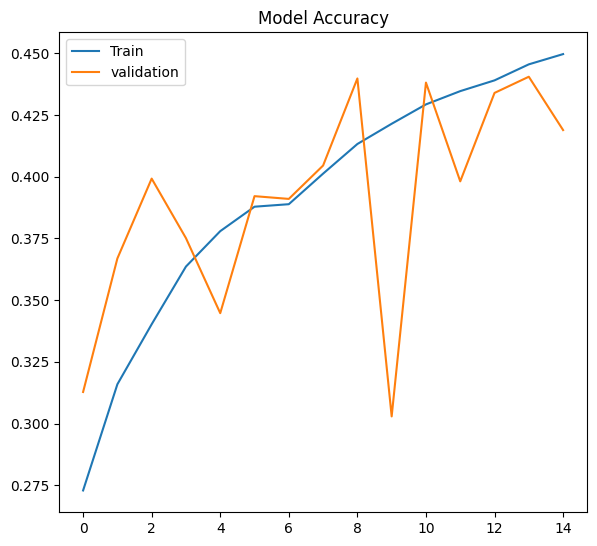

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.legend(['Train','validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,hspace = 0.25,wspace = 0.35)

SAVING MODEL

In [ ]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)